## Data Understanding

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings("ignore")

In [26]:
df = pd.read_excel('dataset/data_pip_dummy.xlsx')
df.head()

,Nama,JK,Agama,Alat Transportasi,Kebutuhan Khusus,Pekerjaan Orang Tua,Usia,Penghasilan Orang Tua,Jumlah Tanggungan,Pemilik KIP,Pemilik KPS,Status
0,Adi Amalia Amalia,L,Islam,Sepeda motor,Tidak ada,Wirausaha,12,4213001,1,Tidak,Tidak,Tidak Layak
1,Adi Amalia Anggraini,L,Islam,Jalan kaki,Tidak ada,Lainnya,9,3249958,Lebih dari 3,Tidak,Tidak,Layak
2,Adi Amalia Cahyo,L,Islam,Lainnya,Tidak ada,Peternak,16,4166323,2,Tidak,Tidak,Tidak Layak
3,Adi Amalia Haris,L,Islam,Sepeda motor,Tidak ada,Lainnya,13,3261966,2,Tidak,Tidak,Layak
4,Adi Amalia Hidayat,L,Islam,Sepeda motor,Tidak ada,Wirausaha,10,3254943,Lebih dari 3,Tidak,Tidak,Layak


# EDA

Mengecek informasi data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Nama                   1000 non-null   object
 1   JK                     1000 non-null   object
 2   Agama                  1000 non-null   object
 3   Alat Transportasi      1000 non-null   object
 4   Kebutuhan Khusus       1000 non-null   object
 5   Pekerjaan Orang Tua    1000 non-null   object
 6   Usia                   1000 non-null   int64 
 7   Penghasilan Orang Tua  1000 non-null   int64 
 8   Jumlah Tanggungan      1000 non-null   object
 9   Pemilik KIP            1000 non-null   object
 10  Pemilik KPS            1000 non-null   object
 11  Status                 1000 non-null   object
dtypes: int64(2), object(10)
memory usage: 93.9+ KB


Mengecek Statistik deskriptif dari dataset

In [28]:
df.describe()

,Usia,Penghasilan Orang Tua
count,1000.000000,1.000000e+03
mean,11.454000,2.722912e+06
std,3.525665,1.264392e+06
min,6.000000,5.078810e+05
25%,8.000000,1.688386e+06
50%,11.000000,2.640530e+06
75%,15.000000,3.842525e+06
max,17.000000,4.990155e+06


Mengecek kolom dengan nilai null

In [29]:
df.isnull().sum()

Nama                     0
JK                       0
Agama                    0
Alat Transportasi        0
Kebutuhan Khusus         0
Pekerjaan Orang Tua      0
Usia                     0
Penghasilan Orang Tua    0
Jumlah Tanggungan        0
Pemilik KIP              0
Pemilik KPS              0
Status                   0
dtype: int64

insight: dari hasil pengecekan, tidak terdapat nilai null

Mengecek Data duplikat

In [30]:
df.duplicated().sum()

0

insight: dari hasil pengecekan tidak terdapat data duplikat

### Visualisasi data

Mengecek outlier pada kolom numerik dari dataset

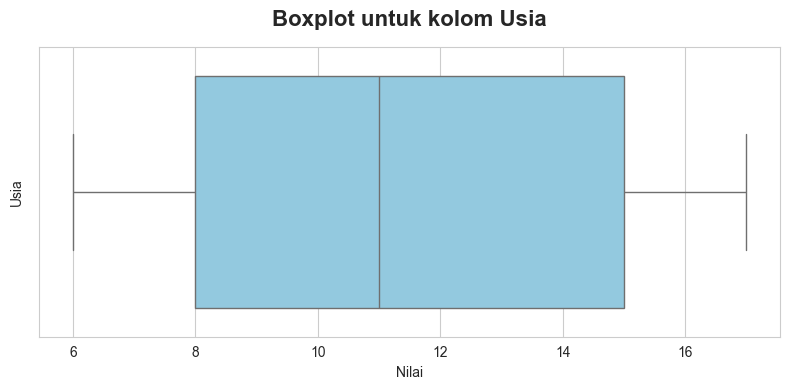

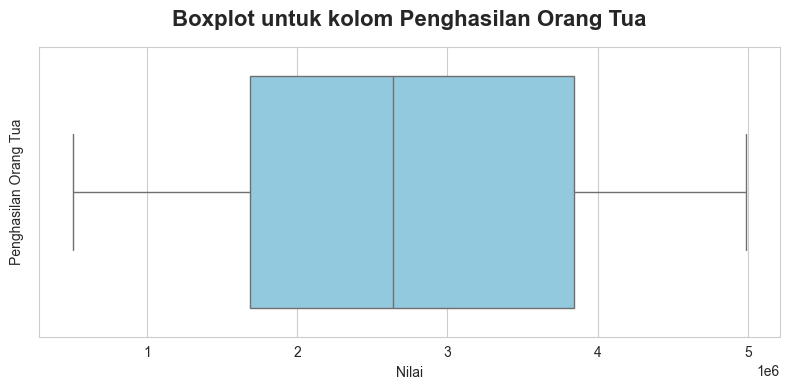

In [31]:
nums_kolom = df.select_dtypes(include=['number']).columns
sns.set_style("whitegrid")

for col in nums_kolom:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color="skyblue", orient="h")
    plt.title(f"Boxplot untuk kolom {col}", fontsize=16, weight='bold', pad=15)
    plt.xlabel("Nilai")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

insight: tidak terdapat outlier dari dataset

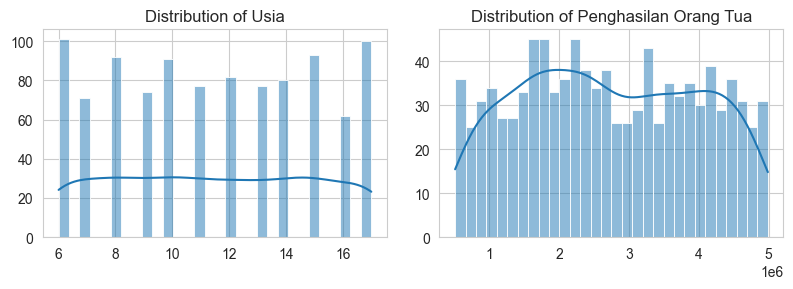

In [32]:
def plot_numerical_distributions_grid(data, columns, cols=3):
    rows = (len(columns) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = axes.flatten() 

    for i, col in enumerate(columns):
        sns.histplot(data[col], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    # Hilangkan subplot kosong jika ada
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Panggil fungsi
plot_numerical_distributions_grid(df, nums_kolom, cols=3)

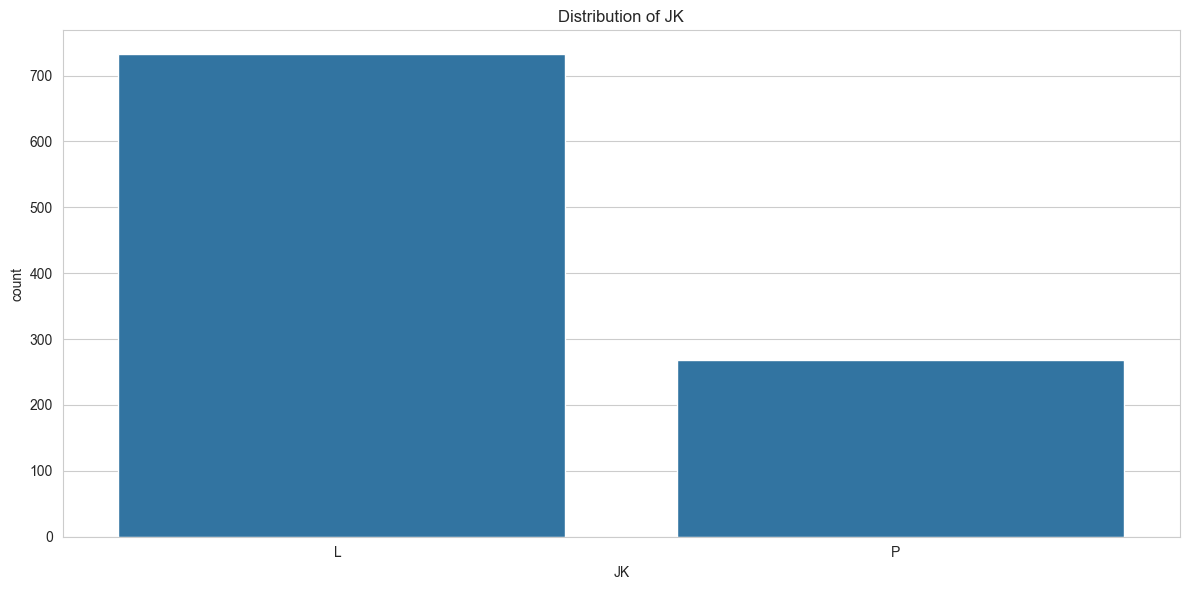

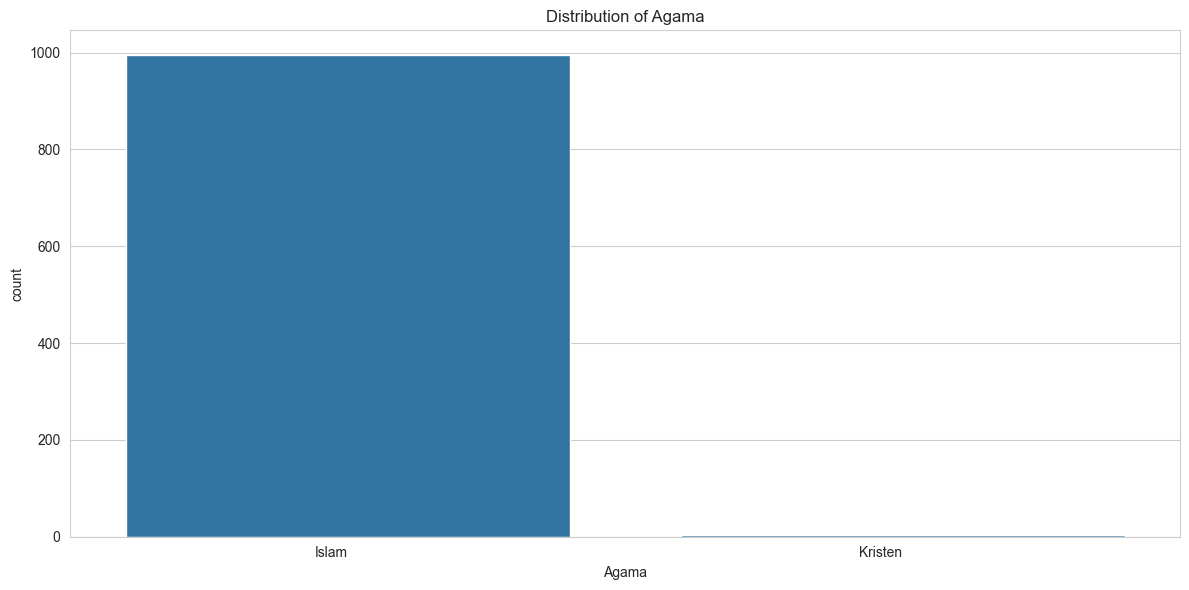

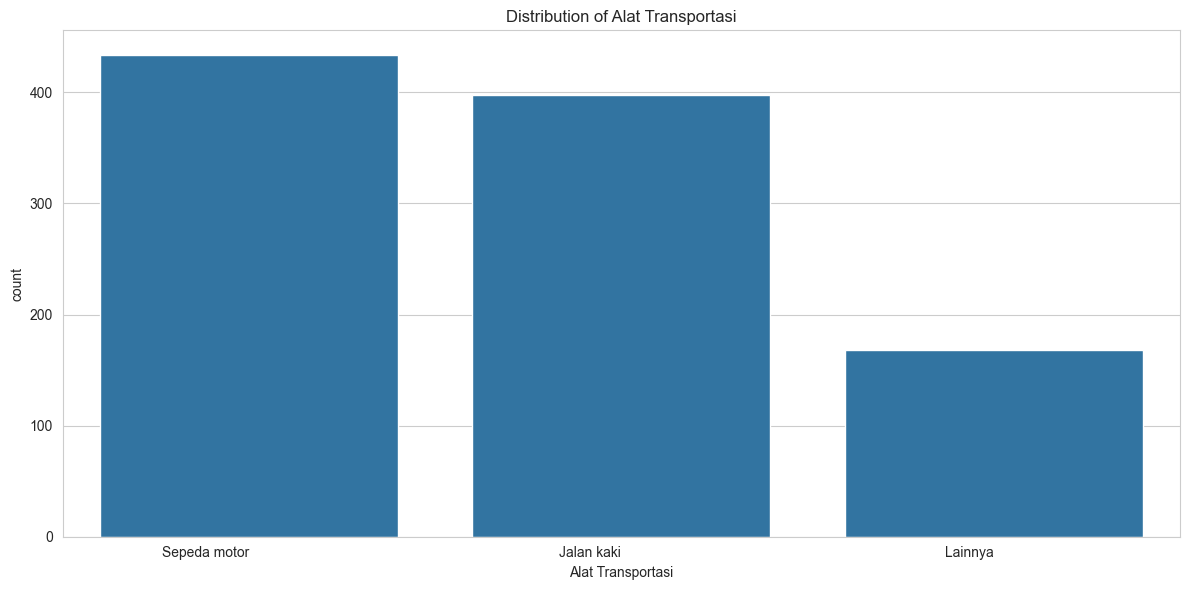

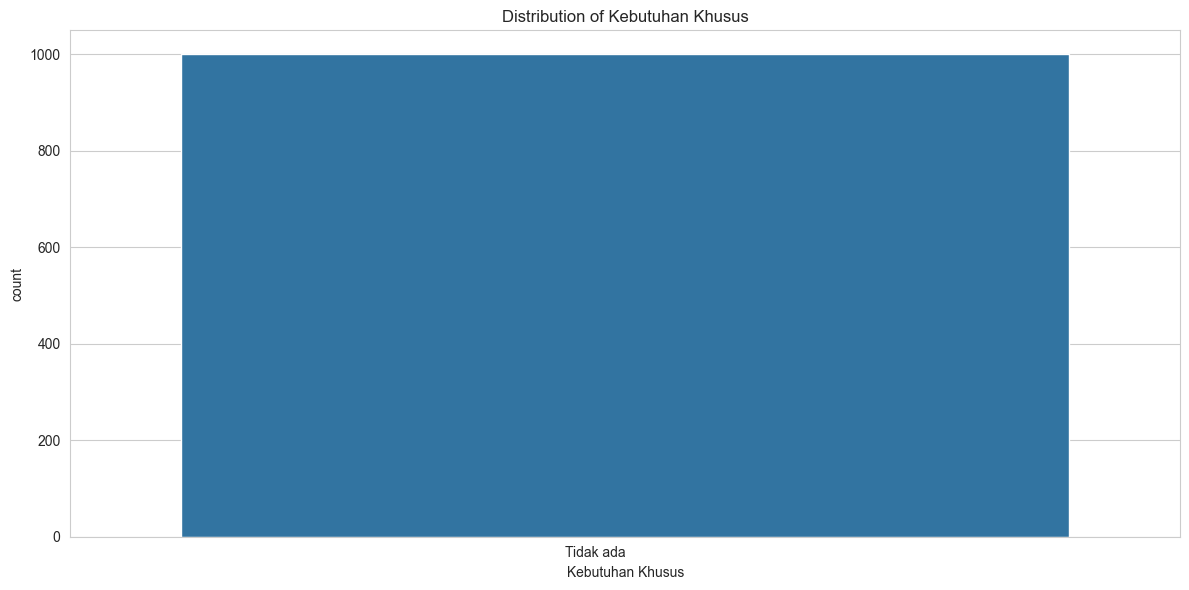

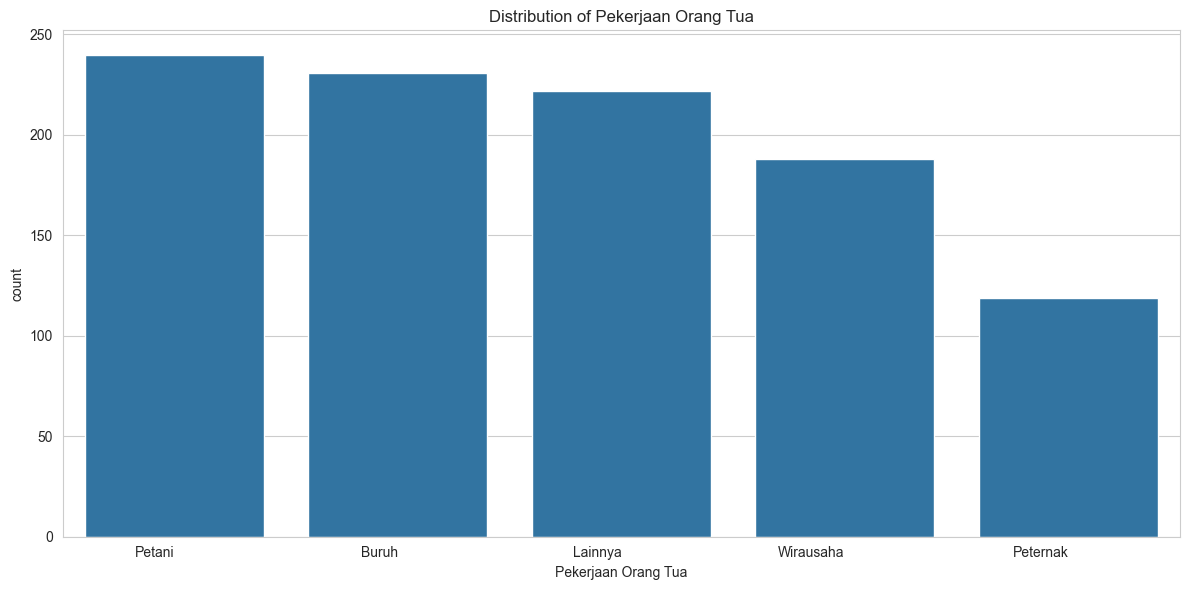

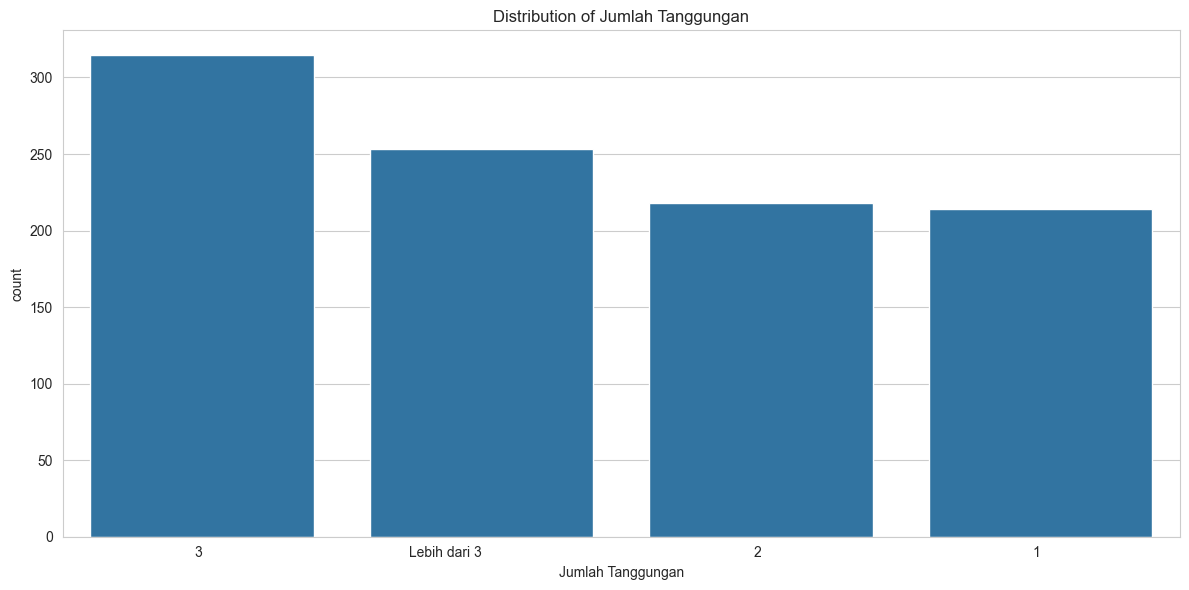

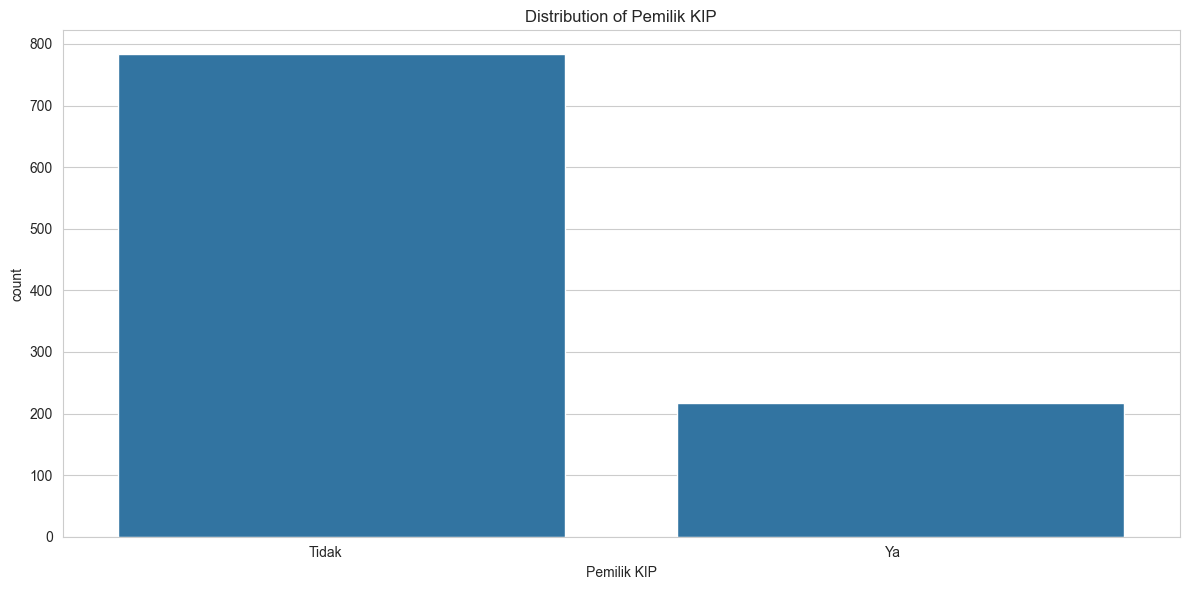

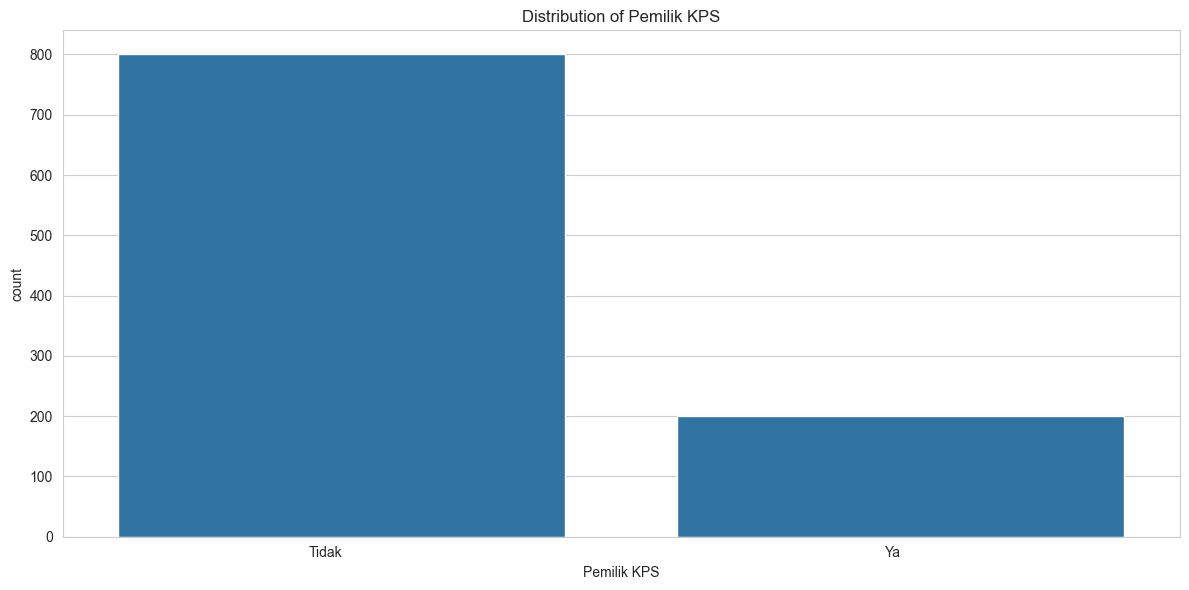

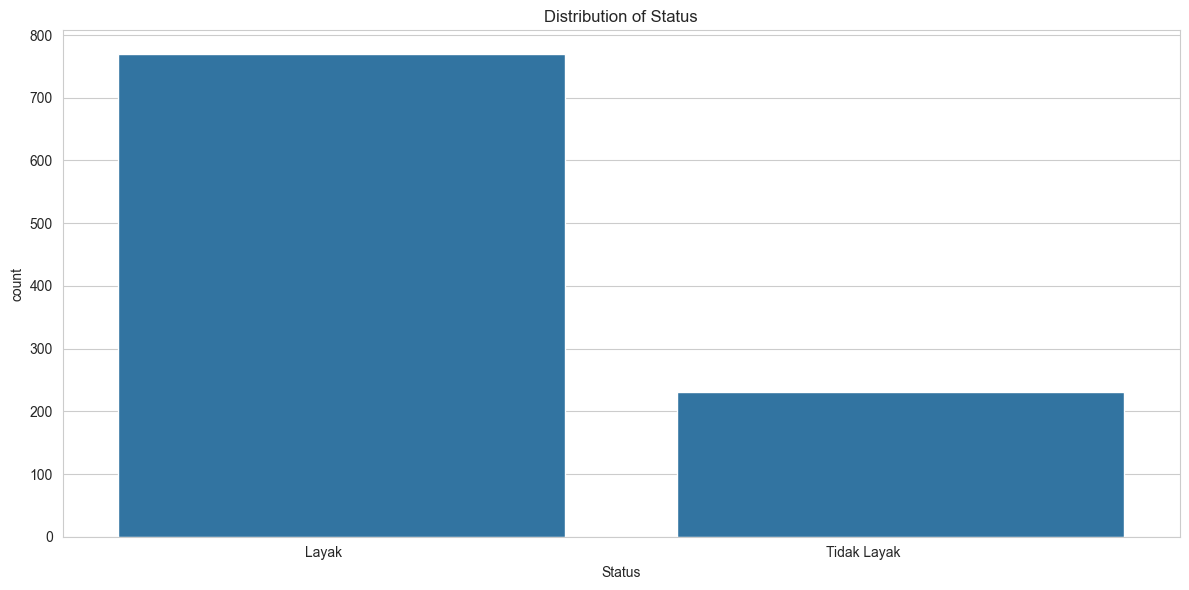

In [33]:
cat_kolom = df.select_dtypes(include=['object']).columns.drop('Nama')

def plot_top_categories(data, column, top_n=20):
    top_categories = data[column].value_counts().nlargest(top_n).index
    plt.figure(figsize=(12,6))
    sns.countplot(data=data[data[column].isin(top_categories)], x=column, order=top_categories)
    plt.xticks(ha='right')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

for col in cat_kolom:
    plot_top_categories(df, col, top_n=20)


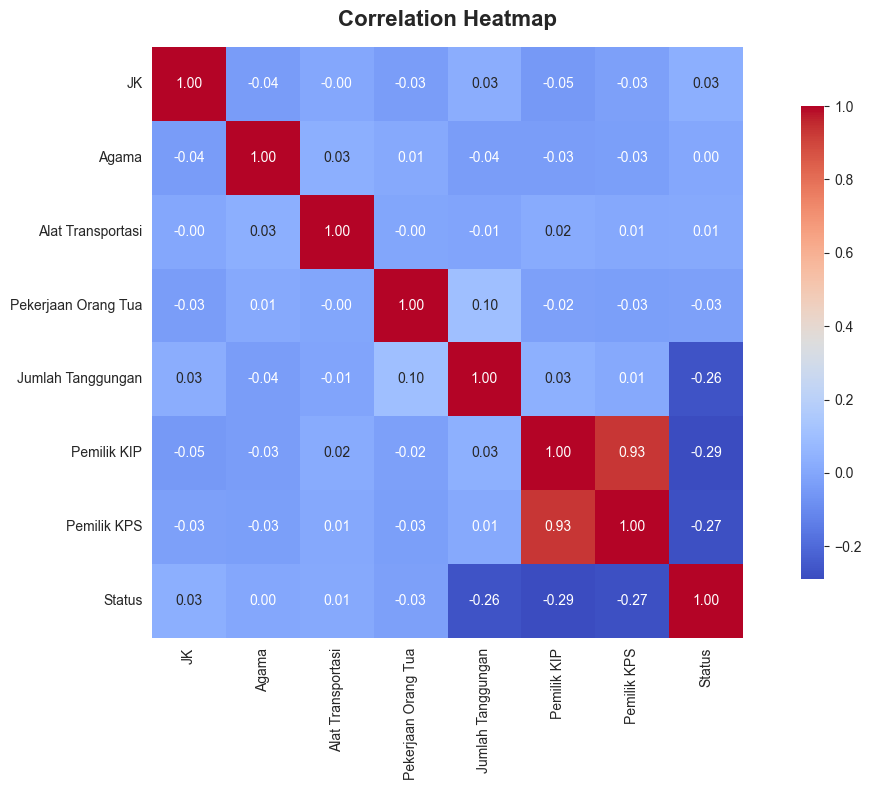

In [34]:
cat_kolom = cat_kolom.drop('Kebutuhan Khusus')
df_heatmap = df[cat_kolom].copy()

le = LabelEncoder()
df_heatmap[cat_kolom] = df_heatmap[cat_kolom].apply(le.fit_transform)

# hitung korelasi
corr = df_heatmap.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16, weight='bold', pad=15)
plt.tight_layout()
plt.show()

## Data Preparation

Menghapus kolom yang tidak diperlukan

In [35]:
df.drop(
    columns=[
        'Nama', 
        'JK',
        'Agama',
        'Kebutuhan Khusus',
        'Usia'
    ], 
    inplace=True
)
df.head()

,Alat Transportasi,Pekerjaan Orang Tua,Penghasilan Orang Tua,Jumlah Tanggungan,Pemilik KIP,Pemilik KPS,Status
0,Sepeda motor,Wirausaha,4213001,1,Tidak,Tidak,Tidak Layak
1,Jalan kaki,Lainnya,3249958,Lebih dari 3,Tidak,Tidak,Layak
2,Lainnya,Peternak,4166323,2,Tidak,Tidak,Tidak Layak
3,Sepeda motor,Lainnya,3261966,2,Tidak,Tidak,Layak
4,Sepeda motor,Wirausaha,3254943,Lebih dari 3,Tidak,Tidak,Layak


## Menyimpan Dataset

In [36]:
df.to_excel('dataset/data_pip_cleaned.xlsx', index=False)